In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

### CNN

In [2]:
import numpy as np
from tensorflow.keras import datasets, models, layers, optimizers

(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

# We'll also normalize the pixel values to be between 0 and 1 to make the computation easier
train_images = train_images / 255.0
test_images = test_images / 255.0

train_images = np.expand_dims(train_images, -1)
test_images = np.expand_dims(test_images, -1)

In [3]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [4]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4532 - accuracy: 0.8351 - val_loss: 0.3570 - val_accuracy: 0.8727
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3066 - accuracy: 0.8890 - val_loss: 0.3125 - val_accuracy: 0.8838
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2607 - accuracy: 0.9046 - val_loss: 0.2819 - val_accuracy: 0.8948
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2265 - accuracy: 0.9162 - val_loss: 0.2789 - val_accuracy: 0.9008
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2022 - accuracy: 0.9241 - val_loss: 0.2637 - val_accuracy: 0.9026
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1794 - accuracy: 0.9315 - val_loss: 0.2568 - val_accuracy: 0.9073
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1596 - accuracy: 0.9405 - val_loss: 0.2534 - val_ac

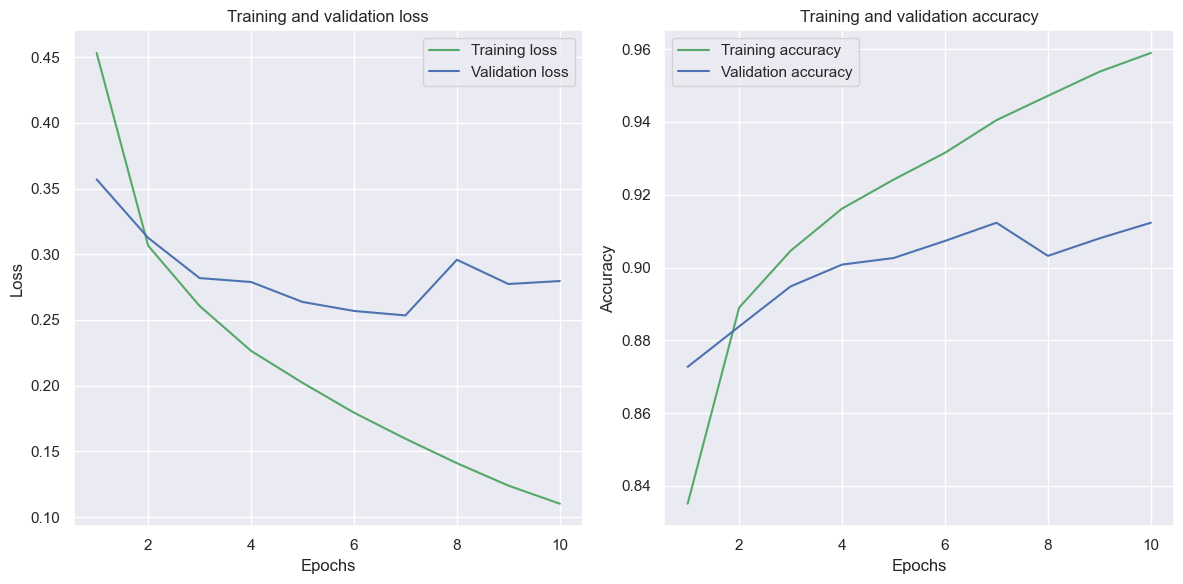

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# "History" object keeps the history of loss and metric values in history.history:
history_dict = history.history

# Plot Training and validation loss:

loss_values = history_dict['loss']  # Loss values for training
val_loss_values = history_dict['val_loss'] # Loss values for validation
epochs = range(1, len(loss_values) + 1) # X-axis values

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(epochs, loss_values, 'g', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Training and validation accuracy:

acc_values = history_dict['accuracy']  # accuracy values for training
val_acc_values = history_dict['val_accuracy'] # accuracy values for validation

plt.subplot(1,2,2)
plt.plot(epochs, acc_values, 'g', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [7]:
# evaluate the model
loss, accuracy = model.evaluate(test_images, test_labels)
print('Test accuracy: %.2f' % accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.2796 - accuracy: 0.9123
Test accuracy: 0.91


### VGG16

In [13]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import Model

# Load the VGG16 model without including the fully connected layer at the end
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze the weights of all layers of the VGG16 model
for layer in vgg_base.layers:
    layer.trainable = False

In [14]:
from tensorflow.keras import layers
from tensorflow.keras import Model

# Add a new fully connected layer for 10-class classification (Fashion MNIST has 10 classes)
x = layers.Flatten()(vgg_base.output)
x = layers.Dense(256, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(10, activation='softmax')(x)

# Define the final model
model = Model(inputs=vgg_base.input, outputs=x)

In [19]:
from tensorflow.keras.optimizers.legacy import Adam

opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

import tensorflow as tf

train_images_resized = tf.image.resize(train_images, [32,32])
test_images_resized = tf.image.resize(test_images, [32,32])

train_images_rgb = tf.image.grayscale_to_rgb(train_images_resized)
test_images_rgb = tf.image.grayscale_to_rgb(test_images_resized)

history = model.fit(train_images_rgb, train_labels, batch_size=64, epochs=10, validation_data=(test_images_rgb, test_labels))

Epoch 1/10
938/938 [==============================] - 133s 142ms/step - loss: 0.6054 - accuracy: 0.7883 - val_loss: 0.4575 - val_accuracy: 0.8317
Epoch 2/10
938/938 [==============================] - 131s 140ms/step - loss: 0.4680 - accuracy: 0.8318 - val_loss: 0.4302 - val_accuracy: 0.8457
Epoch 3/10
938/938 [==============================] - 131s 140ms/step - loss: 0.4434 - accuracy: 0.8394 - val_loss: 0.4347 - val_accuracy: 0.8448
Epoch 4/10
938/938 [==============================] - 132s 140ms/step - loss: 0.4293 - accuracy: 0.8452 - val_loss: 0.4267 - val_accuracy: 0.8430
Epoch 5/10
938/938 [==============================] - 132s 141ms/step - loss: 0.4167 - accuracy: 0.8500 - val_loss: 0.4058 - val_accuracy: 0.8502
Epoch 6/10
938/938 [==============================] - 132s 140ms/step - loss: 0.4150 - accuracy: 0.8512 - val_loss: 0.4201 - val_accuracy: 0.8464
Epoch 7/10
938/938 [==============================] - 132s 141ms/step - loss: 0.4121 - accuracy: 0.8513 - val_loss: 0.3947 -

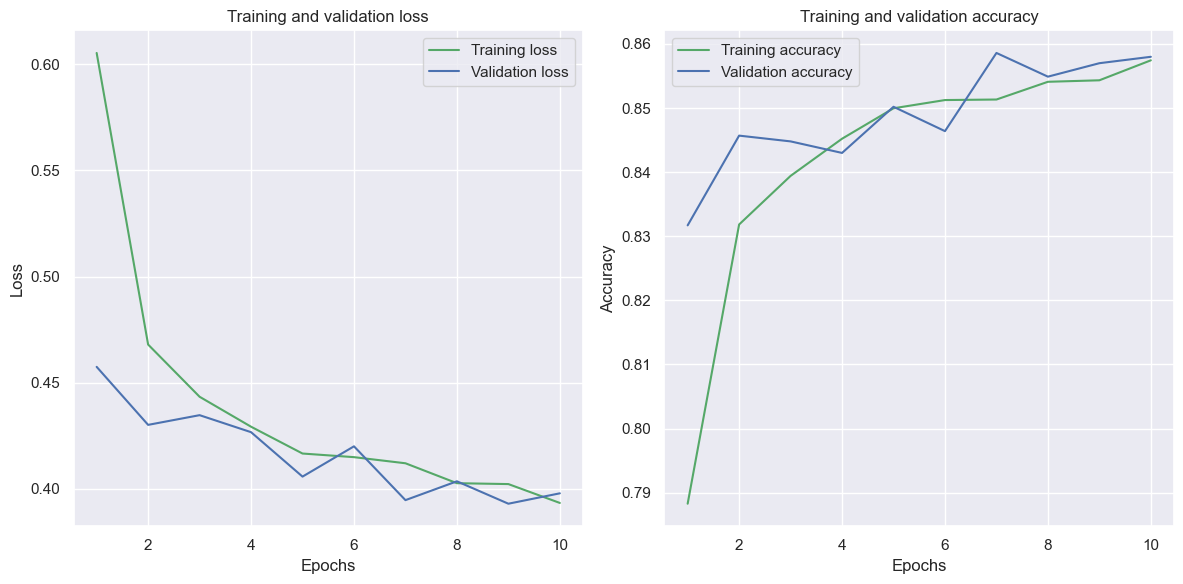

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# "History" object keeps the history of loss and metric values in history.history:
history_dict = history.history

# Plot Training and validation loss:

loss_values = history_dict['loss']  # Loss values for training
val_loss_values = history_dict['val_loss'] # Loss values for validation
epochs = range(1, len(loss_values) + 1) # X-axis values

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(epochs, loss_values, 'g', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Training and validation accuracy:

acc_values = history_dict['accuracy']  # accuracy values for training
val_acc_values = history_dict['val_accuracy'] # accuracy values for validation

plt.subplot(1,2,2)
plt.plot(epochs, acc_values, 'g', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [21]:
# evaluate the model
loss, accuracy = model.evaluate(test_images_rgb, test_labels)
print('Test accuracy: %.2f' % accuracy)

313/313 [==============================] - 21s 66ms/step - loss: 0.3979 - accuracy: 0.8580
Test accuracy: 0.86


In [23]:
model.save(
    "./model/vgg16_model_i.h5")

### Conclusion

Работая над этой задачей мы исследовали важность выбора соответствующей архитектуры нейронной сети для конкретных типов задач и датасетов.
Мы создали convolutional neural network и использовали обученную модель VGG16 для классификации изображений в датасете FashionMNIST. Обе эти модели продемонстрировали значительные улучшения по точности по сравнению с многослойной сетью, рассмотренной в предыдущем задании.
Мы также осознали важность предварительной обработки данных для обучения нейронным сетям. Например, VGG16 требует трехканальные входные данные, поэтому мы должны конвертировать изображения из одноканального (оттенки серого) в трехканальные (RGB). 
В общем плане эта задача подчеркивает значение выбора соответствующей модели и обработки данных для конкретной проблемы. Точность модели существенно улучшается с использованием соответствующей архитектуры сети (в нашем случае – convolutional neural network для обработки изображений).